In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import datetime
import scipy.stats as stats
from dash import Dash, html, dcc
import plotly.graph_objects as go
import sklearn

In [75]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import backend as K

In [76]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.10.1


In [77]:
train = pd.read_csv("train.csv")
#test = pd.read_csv("test.csv")

In [78]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [79]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [80]:
#train.drop(['RoofMatl','MasVnrType','Exterior2nd','Exterior1st','MasVnrArea','LowQualFinSF','GarageYrBlt','FireplaceQu','BsmtHalfBath','BsmtFullBath'], axis=1, inplace=True)

In [81]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [82]:
train.drop(['Alley','MiscFeature','Fence','PoolQC','GarageCond','GarageQual','FireplaceQu'], axis=1, inplace=True)

In [83]:
LotMean = train[train['LotFrontage'].isna()==False]['LotFrontage'].mean()
train.fillna( LotMean,inplace=True)


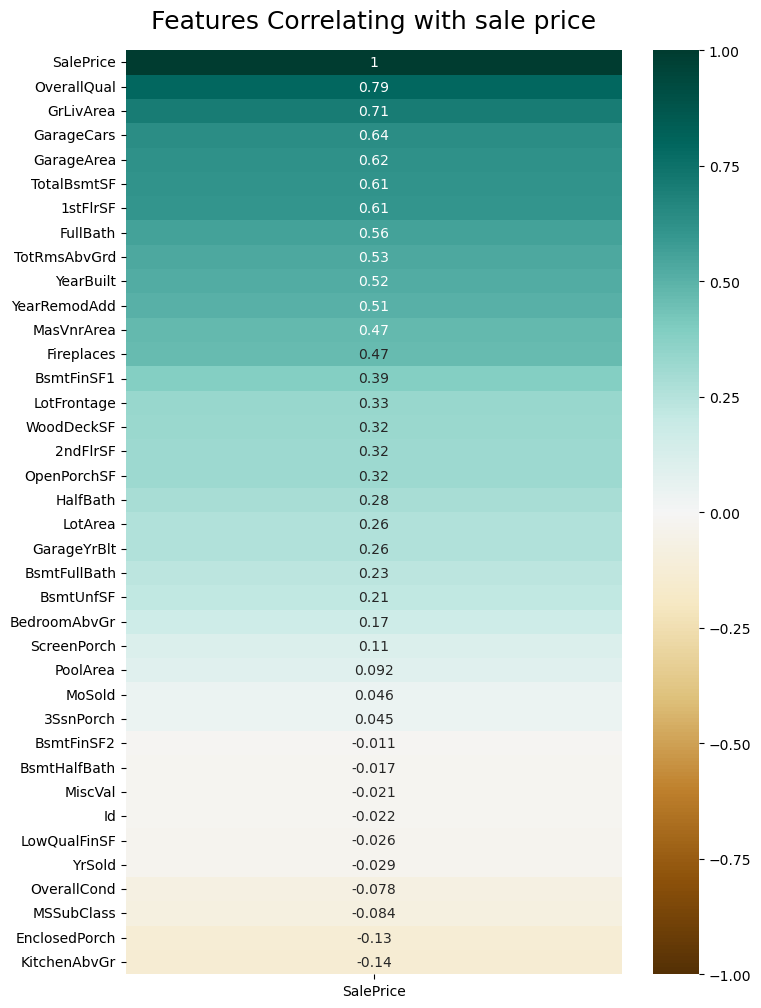

In [84]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(train.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with sale price', fontdict={'fontsize':18}, pad=16);

drop any column between -0.10 and 0.10

In [85]:
train.drop(['Id','PoolArea','MoSold','3SsnPorch','BsmtHalfBath','BsmtFinSF2','MiscVal','LowQualFinSF','YrSold','OverallCond','MSSubClass'], axis=1, inplace=True)

In [86]:
train.drop(['ScreenPorch'], axis=1, inplace=True)

In [87]:
train.groupby('Street').size()

Street
Grvl       6
Pave    1454
dtype: int64

In [88]:
train.drop(['Street'], axis=1, inplace=True)

In [89]:
train.groupby('Utilities').size()

Utilities
AllPub    1459
NoSeWa       1
dtype: int64

In [90]:
train.drop(['Utilities'], axis=1, inplace=True)

In [119]:
train[train['BsmtQual']== 70.04995836802665]

,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,SaleType,SaleCondition,SalePrice


In [92]:
train['BsmtQual'].replace(to_replace=70.04995836802665, value='Po',inplace=True)

In [120]:
train['BsmtCond'].replace(to_replace=70.04995836802665, value='Fa',inplace=True)

In [93]:
train.groupby('BsmtQual').size()

BsmtQual
Ex    121
Fa     35
Gd    618
Po     37
TA    649
dtype: int64

In [94]:
train.drop(train[train['MasVnrType']== 70.04995836802665].index, axis=0, inplace=True)

#### EDA : exploratory data analysis

the figure below demonstrate each variables and their values

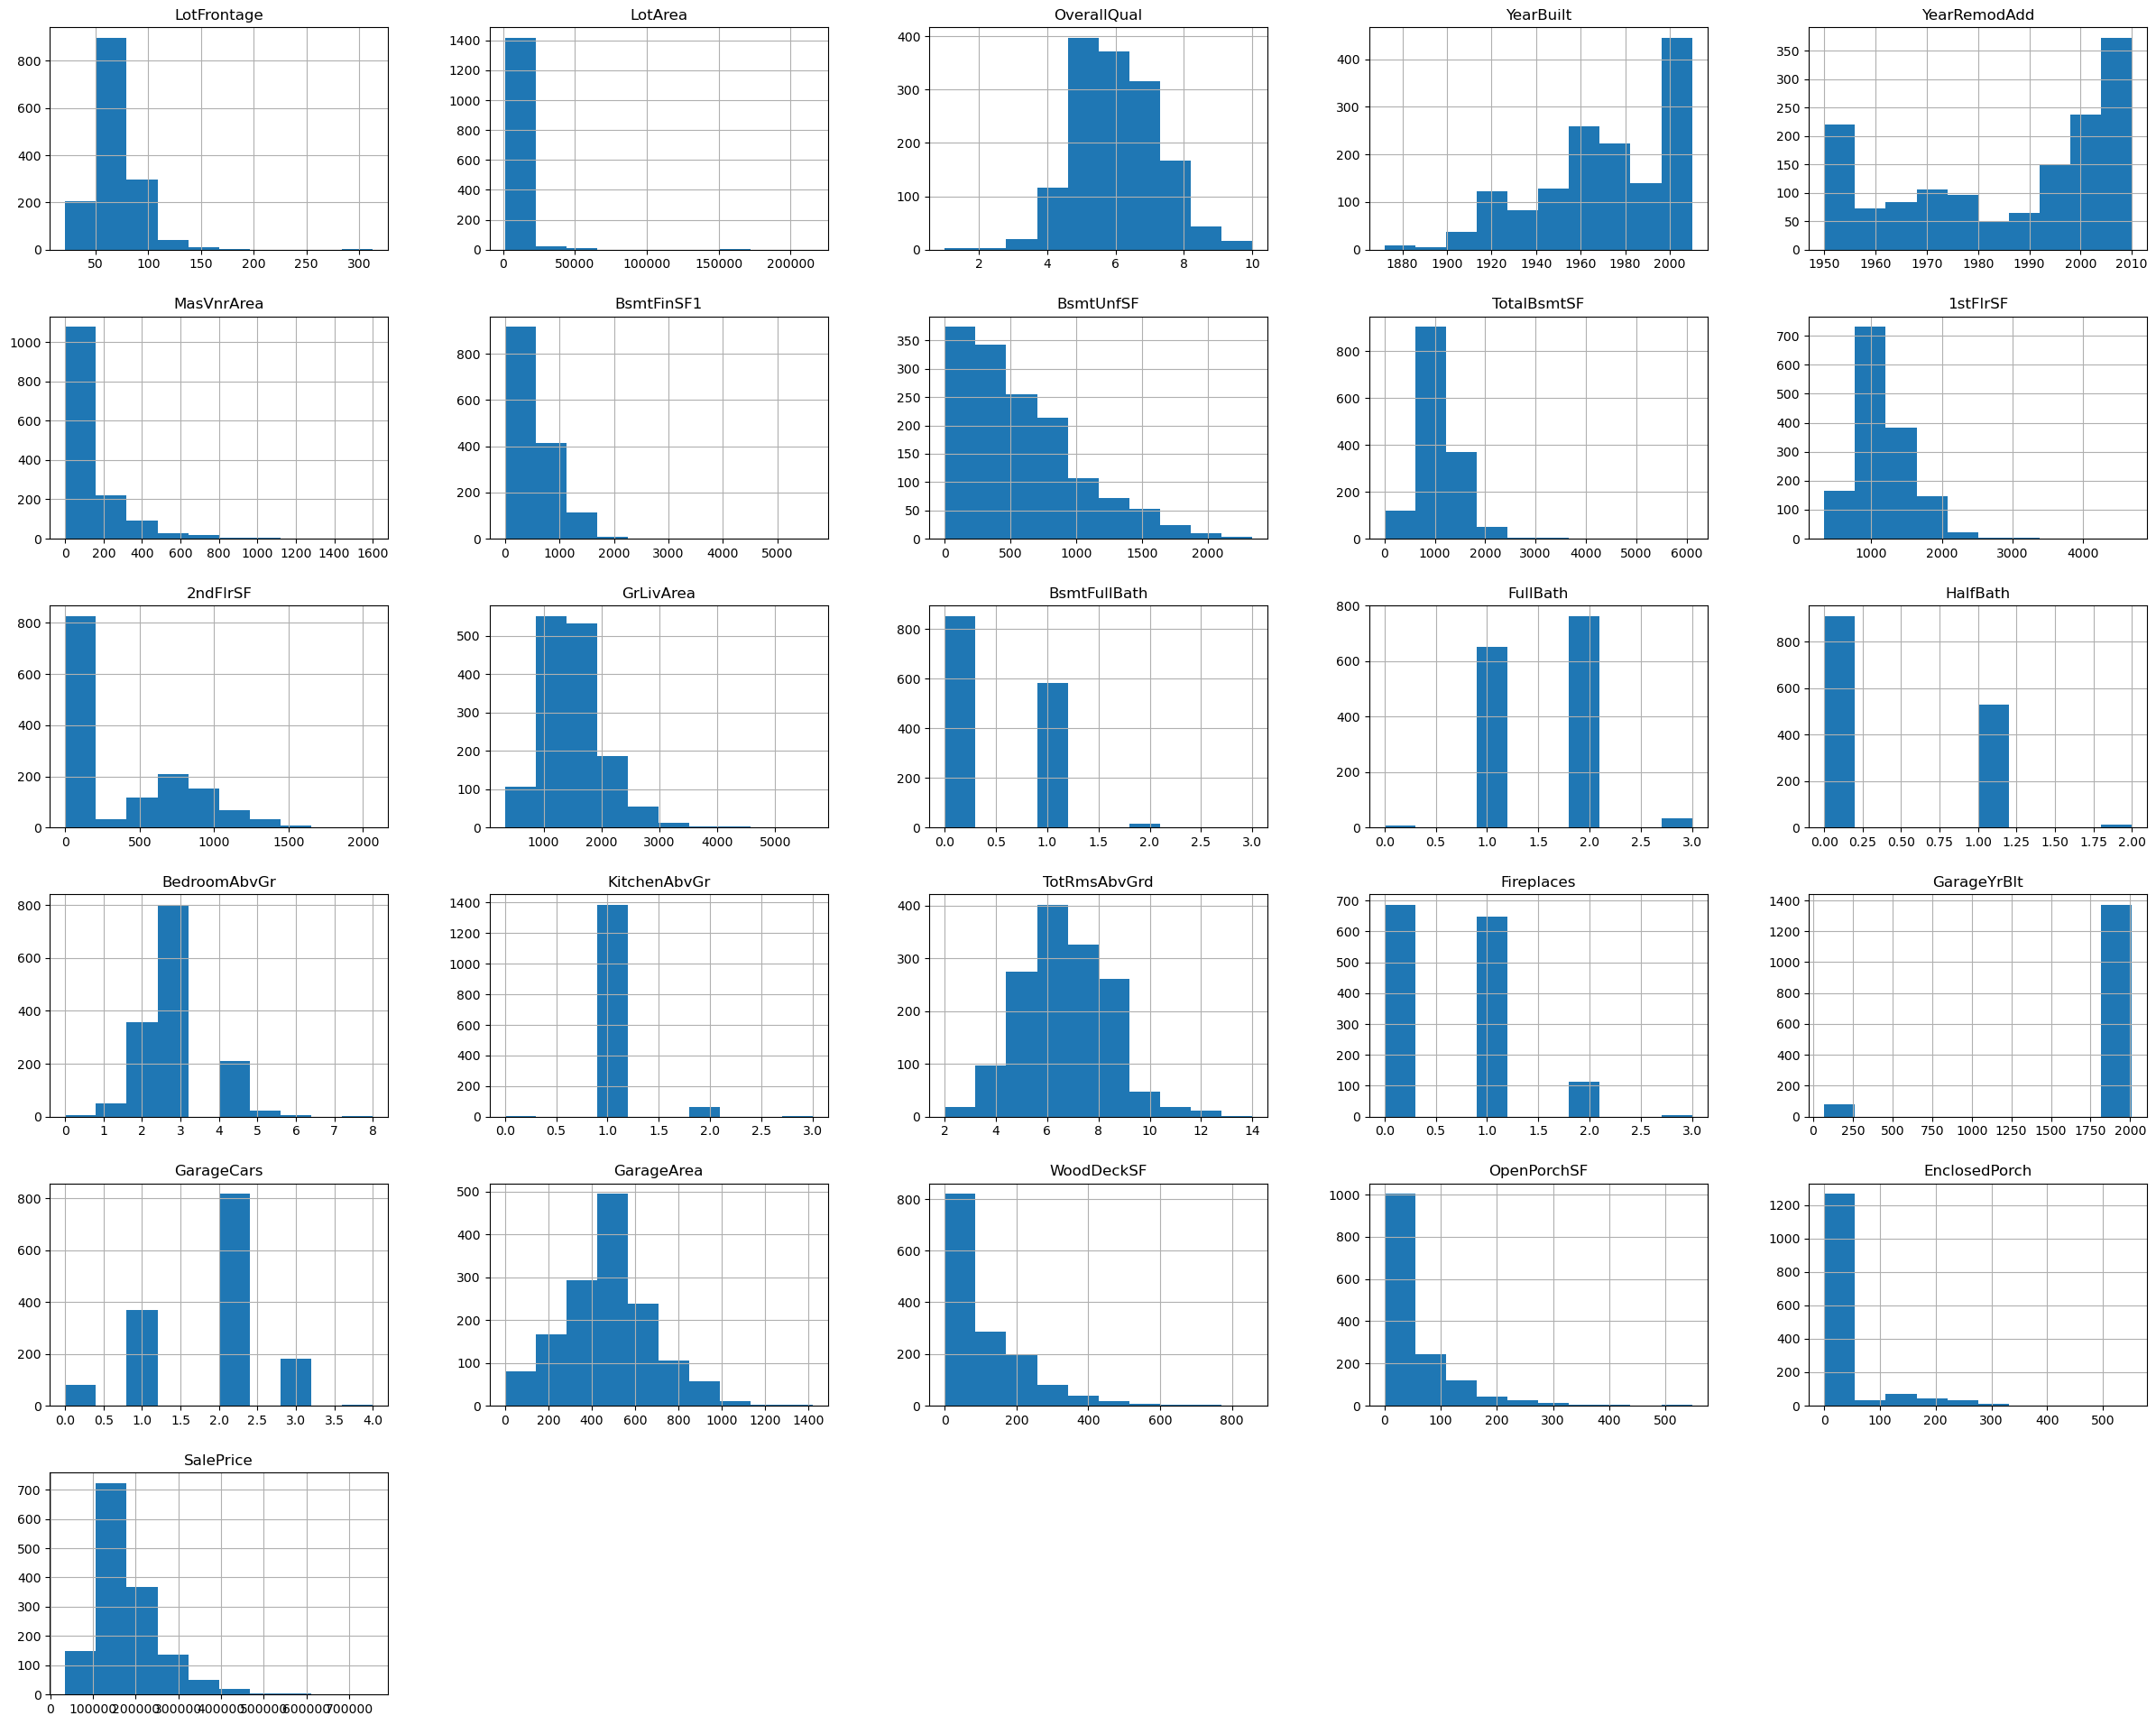

In [95]:
train.hist(figsize=(30,24))
plt.show()

In [96]:
fig = px.histogram(train, x="SalePrice")
fig.show()

In [97]:
from scipy import stats

# Calculate Z-values
train['SalePrice_z'] = np.abs(stats.zscore(train['SalePrice']))

# Filter out outliers
train = train[train['SalePrice_z'] <= 3]

# Remove houses listed for $0
train = train[train['SalePrice'] != 0]

# Drop the column
train = train.drop('SalePrice_z', axis=1)

# Draw a histogram
fig = px.histogram(train, x="SalePrice")
fig.show()

### encode Categorical features


     MSZoning, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond

In [98]:
def findUnique(colNames):
    for colName in colNames:
        print(colName)
        print(train[colName].unique())

In [121]:
findUnique(['MSZoning', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',  'Foundation'])

MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH']
LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'ClearCr' 'NPkVill' 'StoneBr'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl
['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st
['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']
Exterior2nd
['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard'

### Encode Ordinal Features

'LotShape', 'LandContour', 'LandSlope', 'ExterQual', 'ExterCond','BsmtQual', 'BsmtCond'

In [122]:
findUnique(['LotShape', 'LandContour', 'LandSlope', 'ExterQual', 'ExterCond','BsmtQual', 'BsmtCond'])

LotShape
['Reg' 'IR1' 'IR2' 'IR3']
LandContour
['Lvl' 'Bnk' 'Low' 'HLS']
LandSlope
['Gtl' 'Mod' 'Sev']
ExterQual
['Gd' 'TA' 'Ex' 'Fa']
ExterCond
['TA' 'Gd' 'Fa' 'Po' 'Ex']
BsmtQual
['Gd' 'TA' 'Ex' 'Po' 'Fa']
BsmtCond
['TA' 'Gd' 'Fa' 'Po']


In [101]:
def encode_ordinal(col,values):
    train[col].replace({},inplace=True)

split data

In [102]:
train_dataset = train.sample(frac=0.8, random_state=0)
test_dataset = train.drop(train_dataset.index)

In [103]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('SalePrice')
test_labels = test_features.pop('SalePrice')

In [104]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
LotFrontage,69.636848,22.412680
LotArea,10455.310044,10730.659934
OverallQual,6.042795,1.299174
YearBuilt,1970.536245,29.942730
YearRemodAdd,1984.515284,20.494242
MasVnrArea,97.214847,166.983771
BsmtFinSF1,436.948472,447.783738
BsmtUnfSF,551.950218,427.511911
TotalBsmtSF,1038.905677,422.691017
1stFlrSF,1146.627948,371.857638


### Normalize values

### Simple Linear Regression

LotArea

In [105]:
Area = np.array(train_features['LotArea'])

Area_normalizer = layers.Normalization(input_shape=[1,], axis=None)
Area_normalizer.adapt(Area)

In [106]:
Area_model = tf.keras.Sequential([
    Area_normalizer,
    layers.Dense(units=1)
])

Area_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [107]:
Area_model.predict(Area[:10])

1/1 [==============================] - 0s 31ms/step


array([[ 0.5011321 ],
       [-0.08227936],
       [ 0.24583313],
       [ 0.11457172],
       [-0.10715254],
       [-0.03811511],
       [-0.14007051],
       [-0.15689889],
       [-0.5565936 ],
       [ 0.13492996]], dtype=float32)

In [108]:
Area_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

hyperparameter tuning 

In [109]:
history = Area_model.fit(
    train_features['LotArea'],
    train_labels,
    epochs=200,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

In [110]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
195,175462.640625,170592.890625,195
196,175459.734375,170590.062500,196
197,175456.828125,170587.156250,197
198,175453.921875,170584.328125,198
199,175451.046875,170581.468750,199


In [111]:
hist[hist['loss']==(hist['loss'].min())]

,loss,val_loss,epoch
199,175451.046875,170581.46875,199


In [112]:
def plot_loss(history):
  plt.plot(history['loss'], label='loss')
  plt.plot(history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [Area]')
  plt.legend()
  plt.grid(True)

In [113]:
hist['loss']

0      176030.390625
1      176027.500000
2      176024.578125
3      176021.640625
4      176018.750000
           ...      
195    175462.640625
196    175459.734375
197    175456.828125
198    175453.921875
199    175451.046875
Name: loss, Length: 200, dtype: float64

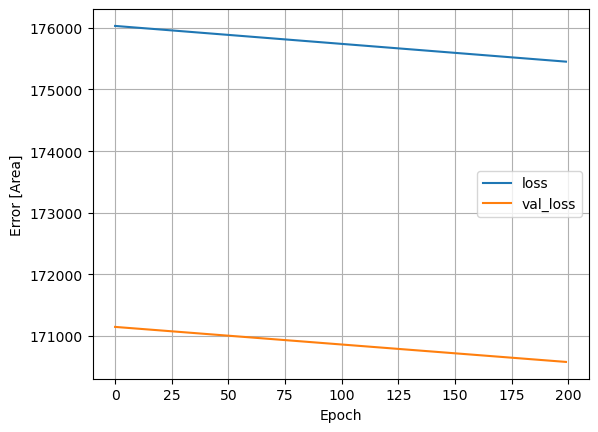

In [114]:
plot_loss(hist)

In [115]:
test_results = {}
test_results['Area_model'] = Area_model.evaluate(
    test_features['LotArea'],
    test_labels, verbose=0)

In [116]:
predictions = Area_model.predict(test_features['LotArea'])
predictions = np.ravel(predictions)
predictions[:5]

9/9 [==============================] - 0s 1ms/step


array([566.00934, 639.3877 , 601.0594 , 544.03394, 524.1074 ],
      dtype=float32)

In [117]:
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [118]:
rmse(test_labels, predictions).numpy()

190543.35015895762

YearBuilt


OverallQual

MSSubClass

### Multiple Linear Regression

### Loss function

### Determining the right number of epochs